# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

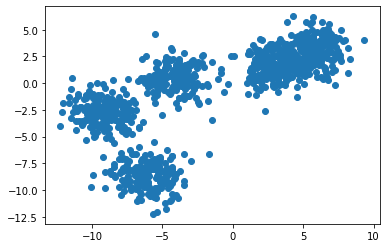

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import numpy as np
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [4]:
def visualization(C, mu):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for i in C:
        for element in C[i]:
            plt.scatter(element[0], element[1], c=colors[i])
    for c in mu:
        plt.scatter(mu[c][0], mu[c][1], s = 100, marker = "1", c='black')
    plt.show()

In [8]:
def kmeans(D, k, e):
    mu = {}
    samples = random.sample(list(D),k)
    for i in range(len(samples)):
        mu[i] = samples[i]   
    
    while True:
        C = {}
        for i in range(k):
            C[i] = []
            
        for xj in D:
            j = np.zeros(len(mu))
            for key in mu:
                j[key] = np.sum((xj - mu[key]) ** 2)
                
            C[np.argmin(j)].append(xj)
    
        mu_old = mu.copy()
        
        mu = {}
        for key in C:
            mu[key] = np.mean(C[key], axis = 0)
                    
        #####################
        visualization(C, mu)#
        #####################
        res_clusters = 0
        for key in mu:
            if np.sum((mu[key] - mu_old[key])**2) <= e:
                res_clusters += 1
                
        if res_clusters == k:
            return C, mu

In [11]:
def sse(C, mu):
    sse = []
    for key in C:
        sse.append(((np.linalg.norm(C[key] - mu[key])) ** 2))   
    return np.sum(sse)

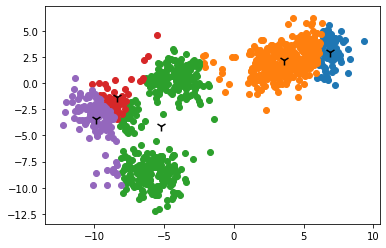

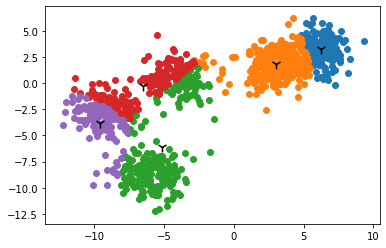

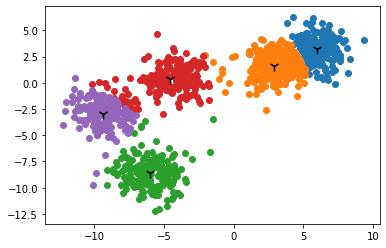

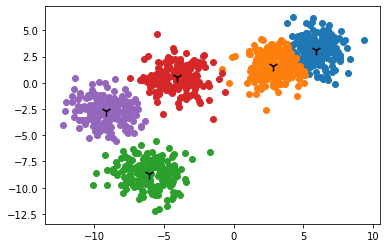

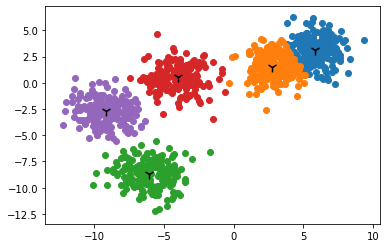

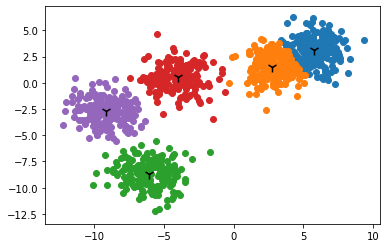

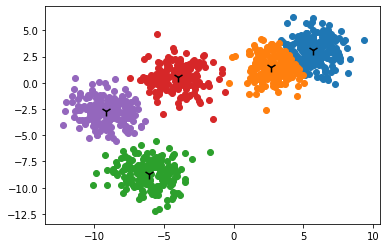

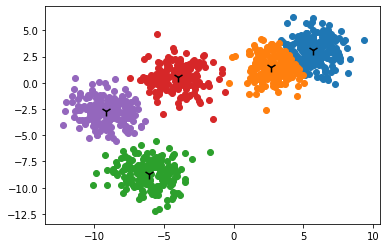

In [7]:
clusters, centers = kmeans(X, 5, 0.0001)

In [12]:
sse(clusters, centers)

2801.0731470556784

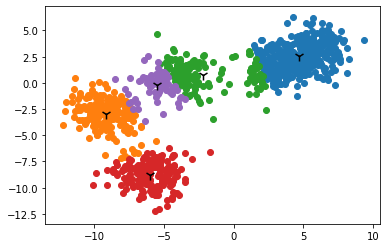

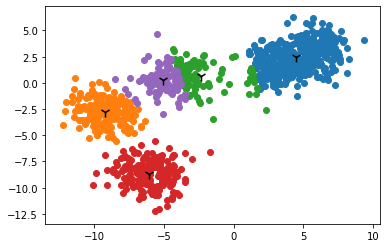

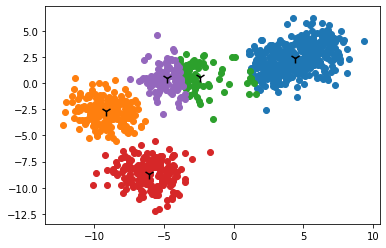

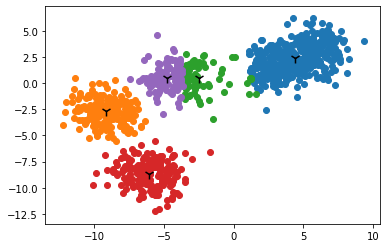

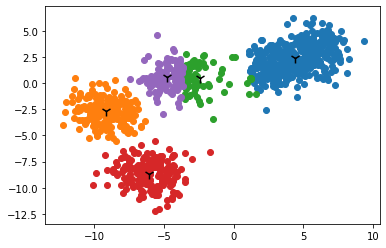

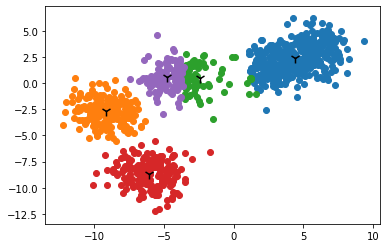

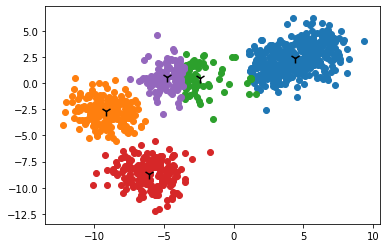

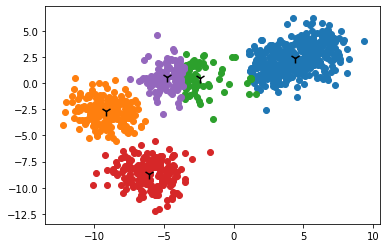

In [7]:
#Неправильный вариант
clusters1, centers1 = kmeans(X, 5, 0.0001)

In [8]:
sse(clusters1, centers1)

3743.43996480729

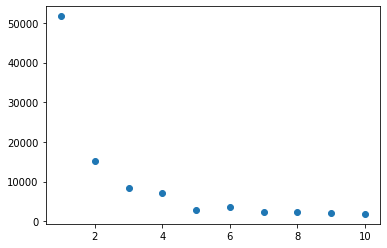

In [12]:
x = range(1,11)
y = []
for i in x:
    clusters, centers = kmeans(X, i, 0.0001)
    y.append(sse(clusters, centers))
plt.scatter(x, y)

## Реальные данные

используйте метод KMeans из sklearn.clustering

1. Выбрать оптимальное количество кластеров.
2. Построить 
2. Произвести анализ получившихся кластеров:
    1. определите средний год автомобилей;
    2. определите средний пробег автомобилей;
    3. определите среднюю мощность;
    4. определите среднюю цену автомобилей;
    5. основные марки автомобилей в кластере;
    6. определите тип топлива;
    7. определите основной тип кузова;
    8. определите основной тип привода;
    9. определите основной тип КПП;
    10. определите количество хозяев автомобиля.
Охарактеризуйте каждый класстер.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [53]:
new_df = pd.get_dummies(df)
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,2013.0,42000.0,1200.0,105.0,689196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2012.0,62000.0,1800.0,152.0,639196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2015.0,4700.0,1600.0,106.0,629196.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2012.0,70000.0,1600.0,110.0,479196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2014.0,50000.0,2700.0,128.0,599196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,1.055883,-1.129295,-1.096928,-0.458895,0.420103,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.868335,-0.842782,-0.125615,0.440164,0.315187,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,1.430978,-1.663641,-0.449386,-0.439766,0.294203,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0.868335,-0.728177,-0.449386,-0.363250,-0.020546,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1.243431,-1.014690,1.331355,-0.018930,0.231254,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [55]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
inertia = []
for it in np.arange(10,11,1):
    method = KMeans(n_clusters=it)
    method.fit(new_df)
    inertia.append(method.inertia_)
    print(it)

10


In [56]:
def cls_info(df, k):
    print('------ Кластер ', k, ' -------')
    claster =  df[method.labels_ == k]
    print(claster['Год'].mean())
    print(claster['Пробег'].mean())
    print(claster['Объем'].mean())
    print(claster['Мощность'].mean())
    print(claster['Цена'].mean())
    print(claster['Привод'].value_counts().head(1))
    print(claster['Марка'].value_counts().head(2))
    print(claster['Кузов'].value_counts().head(2))
    print(claster['КПП'].value_counts().head(2))
    print('---------------------------')

In [57]:
for it in range(10):
    cls_info(df, it)

------ Кластер  0  -------
2011.2947028102462
75721.171101716
1636.4088535190251
126.75503606068142
589337.8423277792
передний    3865
Name: Привод, dtype: int64
Volkswagen    457
Hyundai       381
Name: Марка, dtype: int64
седан      1996
хэтчбек    1399
Name: Кузов, dtype: int64
автомат     3693
вариатор     166
Name: КПП, dtype: int64
---------------------------
------ Кластер  1  -------
2006.1687866927593
156524.83953033268
3431.5557729941293
252.85029354207435
852514.7323874756
полный    1687
Name: Привод, dtype: int64
BMW              342
Mercedes-Benz    258
Name: Марка, dtype: int64
кроссовер      908
внедорожник    527
Name: Кузов, dtype: int64
автомат     1898
вариатор      82
Name: КПП, dtype: int64
---------------------------
------ Кластер  2  -------
1998.8823529411766
83730.30424300868
1687.1745419479266
84.20781099324977
95302.81485053037
передний    907
Name: Привод, dtype: int64
ВАЗ    1234
УАЗ     200
Name: Марка, dtype: int64
седан          959
внедорожник    483
N